In [1]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# wrangle
import src.time_series_acquire as acquire
#import prepare

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt, ExponentialSmoothing

## Exercises

The end result of this exercise should be a Jupyter notebook named `model`.

Using [saas.csv](https://ds.codeup.com/saas.csv) or log data from API usage or store_item_sales

1. Split data (train/test) and resample by any period, except daily, and aggregate using the sum. 
2. Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
    - Simple Average
    - Moving Average
    - Holt's Linear Trend Model
    - Based on previous year/month/etc., this is up to you.

Optional: Using store item demand

1. Predict 2018 total **monthly** sales for a single store and/or item by creating a model using prophet.
2. Return a dataframe with the month, store_id, y-hat, and the confidence intervals (y-hat lower, y-hat upper).
3. Plot the 2018 monthly sales predictions.

## Acquiring and exploring dataframe

In [2]:
df = pd.read_csv('data/saas.csv', index_col = 0)

In [3]:
df.head()

,Customer_Id,Invoice_Id,Subscription_Type,Amount
Month_Invoiced,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0
2014-01-31,1000002,5000002,0.0,0.0
2014-01-31,1000003,5000003,0.0,0.0
2014-01-31,1000004,5000004,1.0,5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 790458 entries, 2014-01-31 to 2017-12-31
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Customer_Id        790458 non-null  int64  
 1   Invoice_Id         790458 non-null  int64  
 2   Subscription_Type  790458 non-null  float64
 3   Amount             790458 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 30.2+ MB


In [9]:
col = df.columns.to_list()

In [11]:
df.columns = [col.lower() for col in df]

In [16]:
df.index = pd.to_datetime(df.index)

In [19]:
df.subscription_type = df.subscription_type.astype(int)

In [20]:
df.amount = df.amount.astype(int)

In [23]:
df.invoice_id.nunique()

790458

In [24]:
pd.crosstab(df.subscription_type, df.amount)

amount,0,5,10,15,20
subscription_type,,,,,
0,496410,0,0,0,0
1,0,178212,0,0,0
2,0,0,70706,0,0
3,0,0,0,26474,0
4,0,0,0,0,18656


In [26]:
df.customer_id.nunique()

29400

<AxesSubplot:xlabel='Month_Invoiced'>

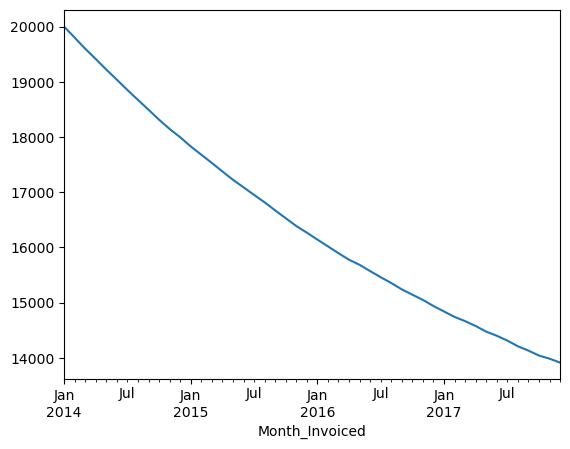

In [27]:
df.resample('M').size().plot()

## Visualize

We will begin by looking at monthly revenue over time.

NameError: name 'StrMethodFormatter' is not defined

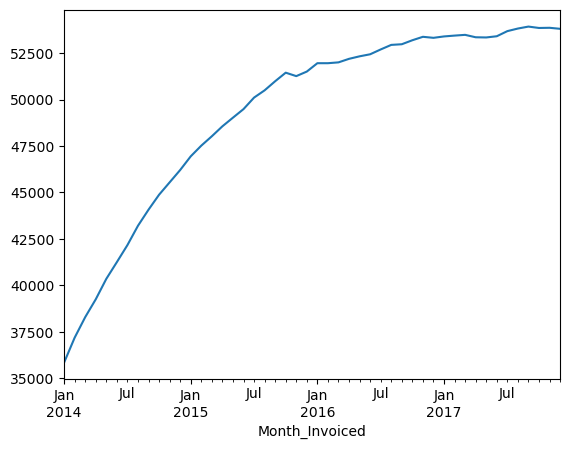

In [30]:
ax = df.resample('M').amount.sum().plot()
#ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,}'))
ax.set(title='Revenue Over Time', ylabel='Revenue', xlabel='')

In [37]:
df.resample('m')[['amount']]

### 1. Split data (train/test) and resample by any period, except daily, and aggregate using the sum. 

1. We will use the training proportion method to split.    
2. Identify the total length of the dataframe and multiply by `train_prop` to get the number of rows that equates to the first x% of the dataframe, which equates to the first x% of the time covered in the data.   (`x = train_prop * 100`)  
3. Select row indices from 0 up to the index representing x-percentile for train, and from the index representing x-percentile through the end of the dataframe for test. In both of these, we will reset the index in order to return dataframes sorted by datetime.  
4. Return train and test dataframes.  

In [36]:
df_resampled.shape()

TypeError: 'tuple' object is not callable